In [ ]:
pip install gym

In [ ]:
pip install --upgrade pygame

In [ ]:
import gym
import numpy as np
import random

# Create Taxi environment
env = gym.make('Taxi-v3')

# Reset the environment to get the initial state
state = env.reset()

num_steps = 99
for s in range(num_steps + 1):
    print(f"Step: {s} out of {num_steps}")

    # Sample a random action from the list of available actions
    action = env.action_space.sample()

    # Perform this action on the environment
    state, reward, done, info = env.step(action)

    # Print the new state by rendering the environment in text mode
    print(env.render(mode="ansi"))

    # If the episode is done, reset the environment
    if done:
        print("Episode finished. Resetting environment.")
        state = env.reset()

# End this instance of the Taxi environment
env.close()


Step: 0 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step: 1 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Step: 2 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step: 3 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step: 4 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Step: 5 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step: 6 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step: 7 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step: 8 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+-----

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

Best Parameters: alpha=0.9, gamma=0.9, epsilon=0.1
Success Rate: 97.30%


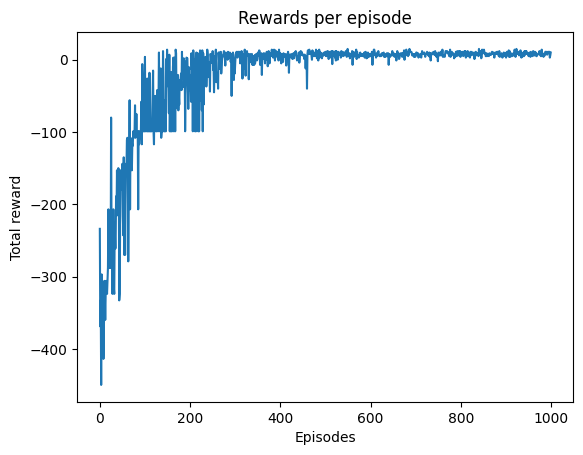

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from itertools import product

#Initialize the Environment
env=gym.make("Taxi-v3")

#Hyperparameter ranges for tuning
alpha=[0.1, 0.5, 0.9] #learning rate
gamma=[0.5, 0.7, 0.9] #discount factor
epsilon=[0.1, 0.5, 1.0] #explore vs exploit

best_params=None
best_score=-float('inf')

#Perform grid search for hyperparameter tuning
for alpha,gamma,epsilon in product(alpha,gamma,epsilon):
  #Initialize the Q-Table with zeroes
  q_table=np.zeros((env.observation_space.n, env.action_space.n))

  num_episodes=1000
  max_steps=99
  rewards=[]

  #Training Loop
  for episode in range(num_episodes):

    #Reset Environment for a new episode
    state=env.reset()
    done=False
    total_reward=0

    for step in range(max_steps):
      #Action selection using epsilon-greedy
      if np.random.random() < epsilon:
        action=env.action_space.sample() #Explore
      else:
        action=np.argmax(q_table[state]) #Exploit

      #Take action and observe the result
      new_state,reward,done,info=env.step(action)

      #Apply Q-Learning Algorithm
      q_curr=q_table[state,action]
      new_best=np.max(q_table[new_state]) #Find the best action from the new state
      q_table[state,action]=(1-alpha)*q_curr+alpha*(reward+gamma*new_best)

      state=new_state
      total_reward+=reward

      if done:
        break

    #Keep track of the total_reward at the end of each episode
    rewards.append(total_reward)

    #Decay epsilon value after each episode
    epsilon=max(0.1,epsilon*0.995)

  #Calculate the average reward for the current hyperparameter set
  avg_reward=np.mean(rewards)
  if avg_reward>best_score:
    best_score=avg_reward
    best_params= (alpha,gamma,epsilon)

# Print the best hyperparameters
print(f"Best Parameters: alpha={best_params[0]}, gamma={best_params[1]}, epsilon={best_params[2]}")

# Train using the best hyperparameters
alpha, gamma, epsilon = best_params
q_table = np.zeros((env.observation_space.n, env.action_space.n))
num_episodes = 1000
max_steps = 99
rewards = []

for episode in range(num_episodes):

    #Reset Environment for a new episode
    state=env.reset()
    done=False
    total_reward=0

    for step in range(max_steps):
      #Action selection using epsilon-greedy
      if np.random.random() < epsilon:
        action=env.action_space.sample() #Explore
      else:
        action=np.argmax(q_table[state]) #Exploit

      #Take action and observe the result
      new_state,reward,done,info=env.step(action)

      #Apply Q-Learning Algorithm
      q_curr=q_table[state,action]
      new_best=np.max(q_table[new_state]) #Find the best action from the new state
      q_table[state,action]=(1-alpha)*q_curr+alpha*(reward+gamma*new_best)

      state=new_state
      total_reward+=reward

      if done:
        break

    #Keep track of the total_reward at the end of each episode
    rewards.append(total_reward)

    #Decay epsilon
    epsilon=np.exp(-0.05*episode)

#Plot rewards per episode to visualize learning progress
plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Total reward")
plt.title("Rewards per episode")
plt.show

# Evaluate the trained Q-table
successful_episodes = 0
for episode in range(num_episodes):
    state = env.reset()
    done = False

    for step in range(max_steps):
      action=np.argmax(q_table[state]) #Exploit

      #Take action and observe new state and reward
      state,reward,done,info=env.step(action)

      if done:
        successful_episodes+=1
        break

# Calculate success rate
success_rate = successful_episodes / num_episodes
print(f"Success Rate: {success_rate * 100:.2f}%")

env.close()




In [ ]:
test_state=env.reset()

print(env.render(mode="ansi"))
score=0
done=False

for step in range(max_steps):
  print(f"Step{step+1}")
  action=np.argmax(q_table[test_state])

  test_state,reward,done,info=env.step(action)
  score+=reward
  print(f"Your score is {score}")



  print(env.render(mode="ansi"))

  if done:
    print("It was a success")
    break

env.close()


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step1
Your score is -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step2
Your score is -2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step3
Your score is -3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step4
Your score is -4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step5
Your score is -5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step6
Your score is -6
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step7
Your score is -7
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step8
Your score is -8
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
